In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
# Load dataset
df =  pd.read_csv("/content/Weather Dataset.csv")

In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [32]:
# Remove unnecessary columns
#df = df.drop('Wind Speed (km/h)',axis =1)
# df = df.drop('Wind Bearing (degrees)',axis =1)
# df = df.drop('Visibility (km)',axis =1)
df = df.drop('Loud Cover',axis =1)
# df = df.drop('Pressure (millibars)',axis =1)
df = df.drop('Daily Summary',axis =1)
# df.head()

KeyError: "['Loud Cover'] not found in axis"

In [31]:
df = df.drop('Summary',axis =1)
df = df.drop('Precip Type',axis =1)
# df = df.drop('Apparent Temperature (C)',axis =1)
# df.head()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            3780 non-null   object 
 1   Temperature (C)           3780 non-null   float64
 2   Apparent Temperature (C)  3780 non-null   float64
 3   Humidity                  3780 non-null   float64
 4   Wind Speed (km/h)         3780 non-null   float64
 5   Wind Bearing (degrees)    3780 non-null   float64
 6   Visibility (km)           3780 non-null   float64
 7   Pressure (millibars)      3780 non-null   float64
dtypes: float64(7), object(1)
memory usage: 236.4+ KB


In [34]:
# Check for missing values
print(df.isnull().sum())
# Drop missing values
df = df.dropna()
# Remove duplicates
df = df.drop_duplicates()

Formatted Date              0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64


In [35]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,9.344367,9.071731,0.014304,10.011831,201.519635,8.034247,994.984732
std,40.993225,9.926594,39.849472,5.962815,91.274419,40.266185,151.674735
min,-2000.000000,-11.911111,-2000.000000,0.000000,0.000000,-2000.000000,0.000000
25%,2.155556,-0.294444,0.710000,5.313000,146.000000,5.538400,1010.780000
50%,10.577778,10.577778,0.860000,9.402400,198.000000,9.982000,1015.180000
75%,17.150000,17.150000,0.930000,13.652800,280.000000,11.270000,1023.520000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,1042.310000


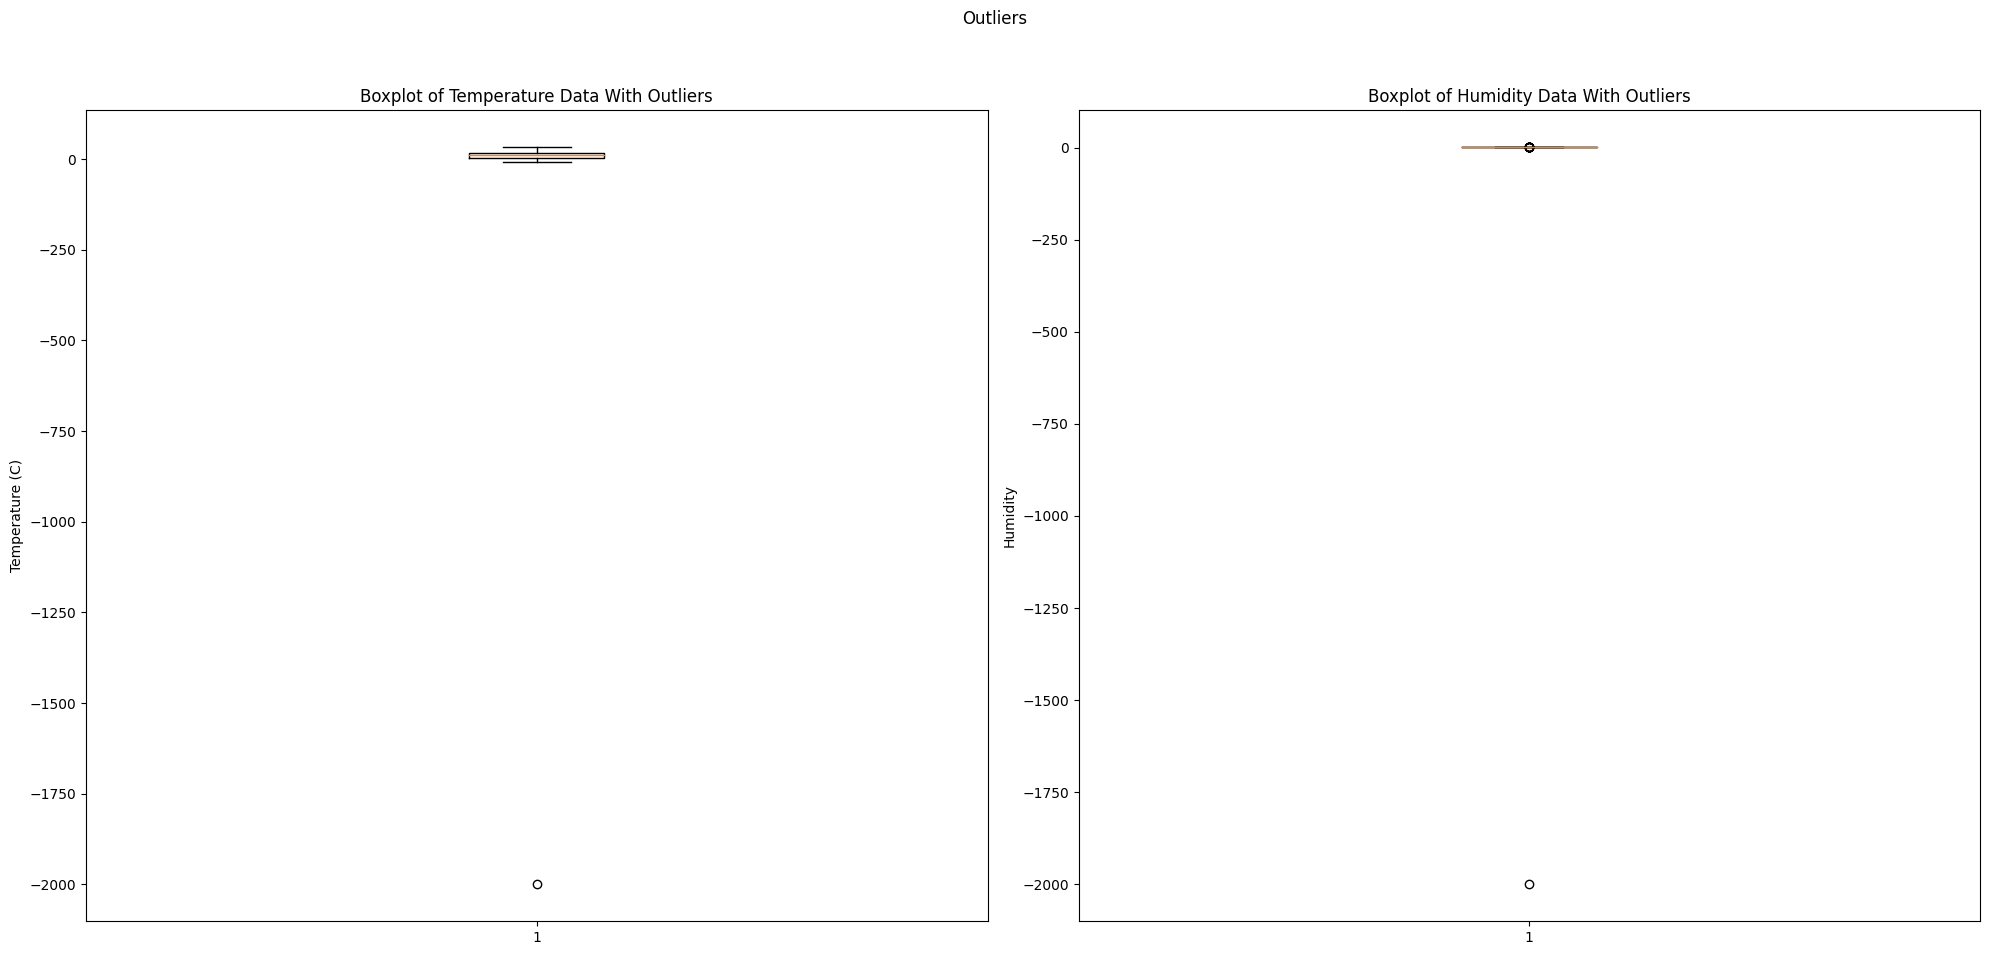

In [36]:
# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=[20, 10])

# Plot boxplot for Temperature
ax[0].boxplot(df['Temperature (C)'])
ax[0].set_title("Boxplot of Temperature Data With Outliers")
ax[0].set_ylabel('Temperature (C)')

# Plot boxplot for Humidity
ax[1].boxplot(df['Humidity'])
ax[1].set_title("Boxplot of Humidity Data With Outliers")
ax[1].set_ylabel('Humidity')

# Overall title
plt.suptitle('Outliers')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

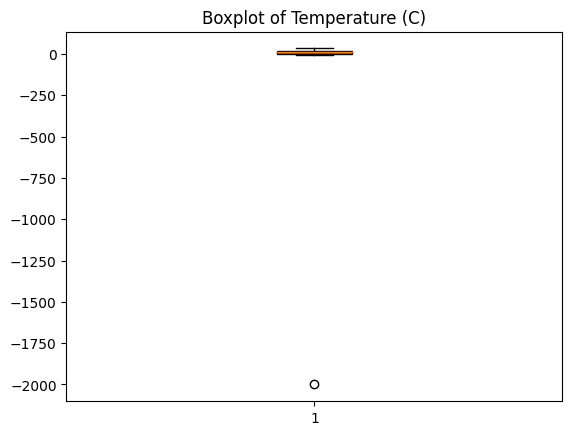

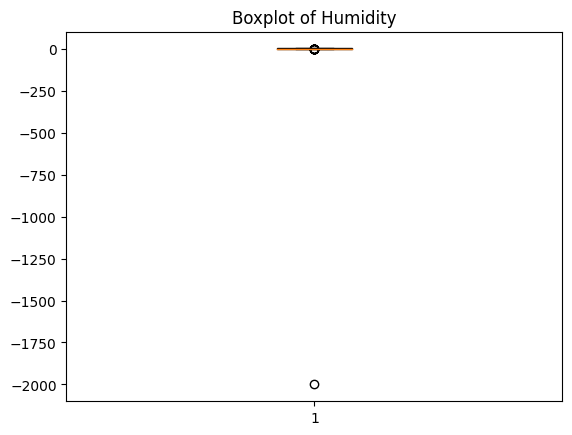

Temperature Fliers: [-2000.]
Humidity Fliers: [ 3.7e-01  3.6e-01  3.7e-01  3.7e-01  3.7e-01  3.7e-01  3.7e-01  3.2e-01
  3.5e-01  3.2e-01  3.5e-01  3.7e-01  3.2e-01  3.5e-01  3.7e-01  3.6e-01
 -2.0e+03]


In [37]:
# Function to display boxplot information and fliers
def display_boxplot_info(df, column):
    fig, ax = plt.subplots()

    # Create boxplot and capture the result
    boxplot = ax.boxplot(df[column], patch_artist=True)

    # Extract fliers from the boxplot object
    if len(boxplot['fliers']) > 0:
        fliers = boxplot['fliers'][0].get_ydata()
    else:
        fliers = []

    # Display the boxplot
    ax.set_title(f"Boxplot of {column}")
    plt.show()

    return fliers

    print(f"Fliers for {column}:")
    print(fliers)

    # Display the boxplot
    ax.set_title(f"Boxplot of {column}")
    plt.show()

# Display fliers for each column
temperature_fliers = display_boxplot_info(df, 'Temperature (C)')
humidity_fliers = display_boxplot_info(df, 'Humidity')

# Print fliers
print("Temperature Fliers:", temperature_fliers)
print("Humidity Fliers:", humidity_fliers)

In [38]:
# Remove outlier
df = df[~df['Temperature (C)'].isin(temperature_fliers)]
df = df[~df['Humidity'].isin(humidity_fliers)]

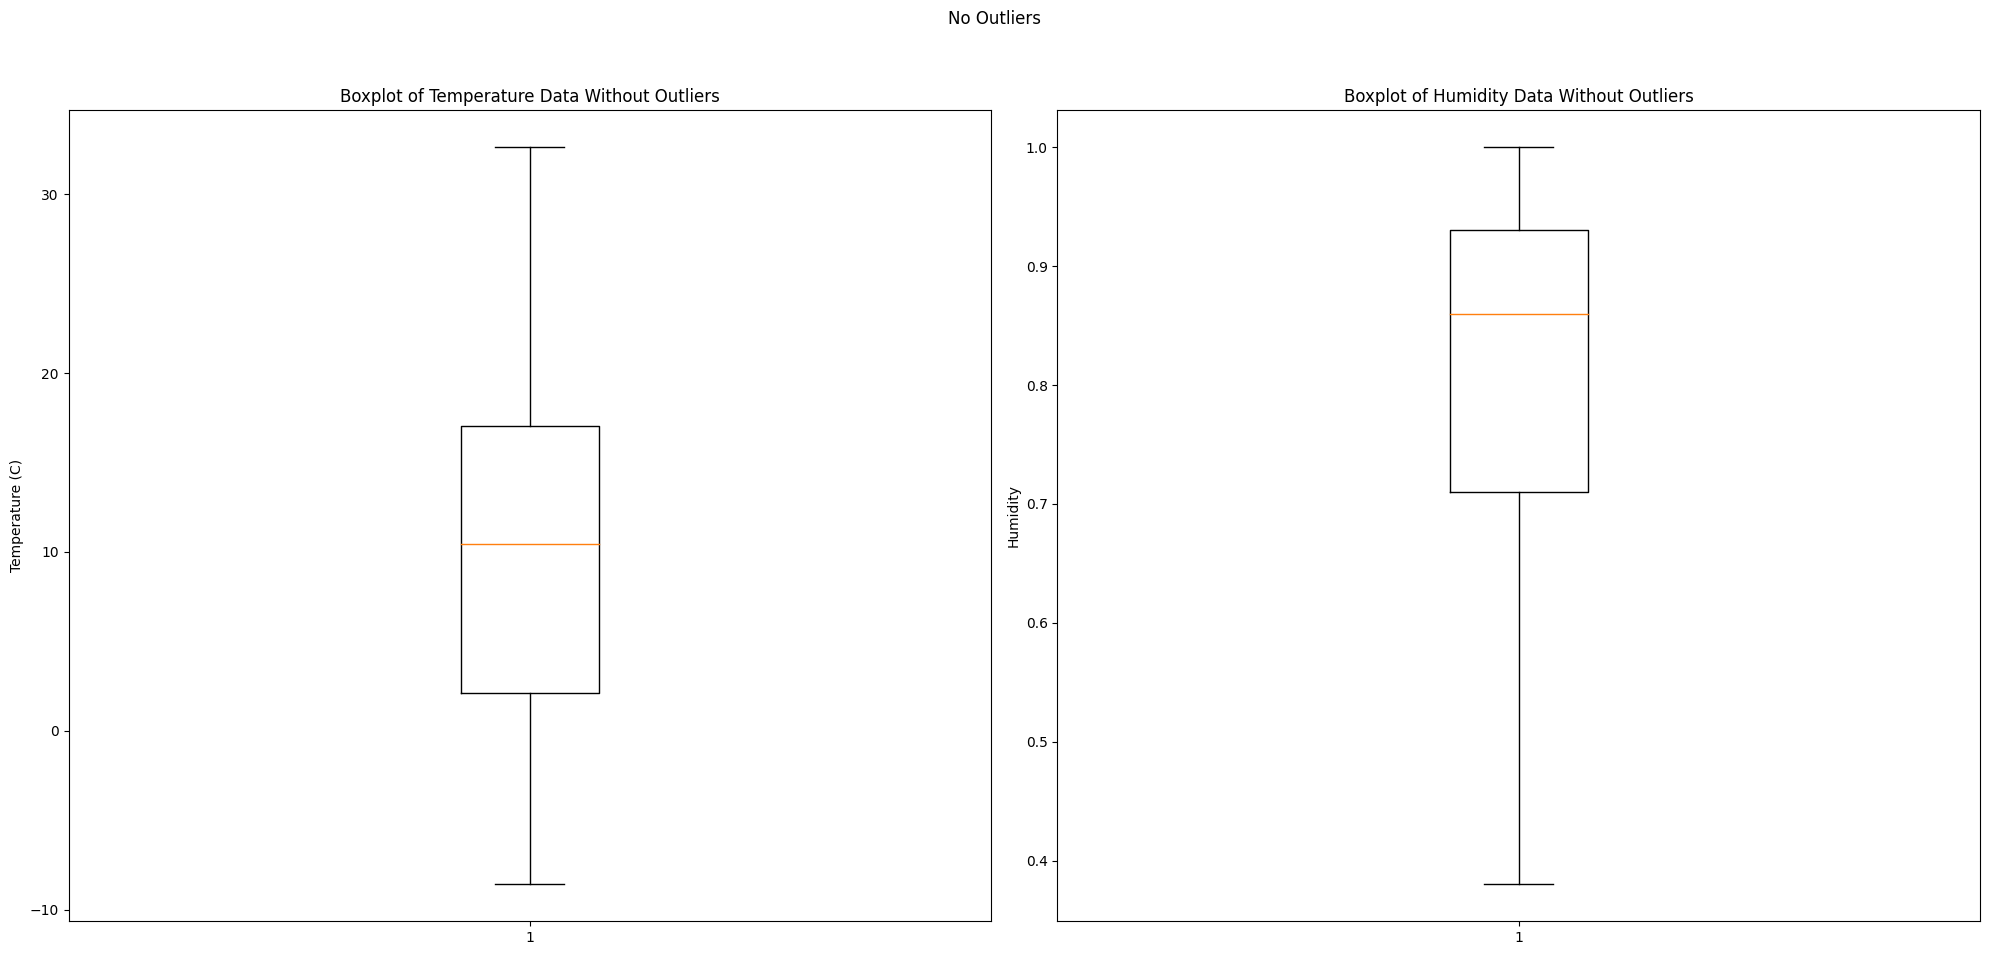

In [39]:
# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=[20, 10])

# Plot boxplot for Temperature
ax[0].boxplot(df['Temperature (C)'])
ax[0].set_title("Boxplot of Temperature Data Without Outliers")
ax[0].set_ylabel('Temperature (C)')

# Plot boxplot for Humidity
ax[1].boxplot(df['Humidity'])
ax[1].set_title("Boxplot of Humidity Data Without Outliers")
ax[1].set_ylabel('Humidity')

# Overall title
plt.suptitle('No Outliers')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [40]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000
mean,10.045585,8.966460,0.810931,10.022112,201.711546,8.012702,994.845525
std,8.758224,9.877281,0.158388,5.961223,91.340649,40.409679,152.210158
min,-8.594444,-11.911111,0.380000,0.000000,0.000000,-2000.000000,0.000000
25%,2.127778,-0.336111,0.710000,5.321050,146.000000,5.441800,1010.780000
50%,10.422222,10.422222,0.860000,9.418500,199.000000,9.982000,1015.200000
75%,17.061111,17.061111,0.930000,13.676950,280.000000,11.270000,1023.570000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,1042.310000


In [41]:
# Plot temperature over time
df['date'] = pd.to_datetime(df['Formatted Date'])
df['Formatted Date'] = df['date']
df = df.drop('date',axis=1)
df


<ipython-input-41-4a22246c2e96>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['Formatted Date'])


,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00+02:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00+02:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00+02:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00+02:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
2515,2006-02-20 19:00:00+01:00,9.094444,6.594444,0.82,16.8084,129.0,9.9820,1010.08
2516,2006-02-20 20:00:00+01:00,8.905556,5.827778,0.78,21.8799,140.0,9.9820,1009.57
2517,2006-02-20 21:00:00+01:00,8.883333,5.527778,0.74,24.9228,150.0,15.8263,1009.60
2518,2006-02-20 22:00:00+01:00,8.266667,5.272222,0.77,19.3522,170.0,14.9569,1010.34


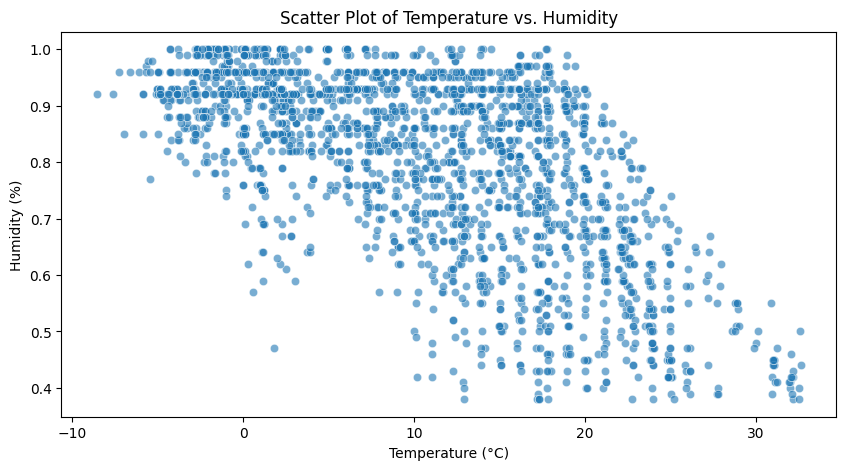

In [42]:
# Plot a scatter plot of temperature vs. humidity
plt.figure(figsize=(10, 5))
plt.scatter(df['Temperature (C)'], df['Humidity'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.show()

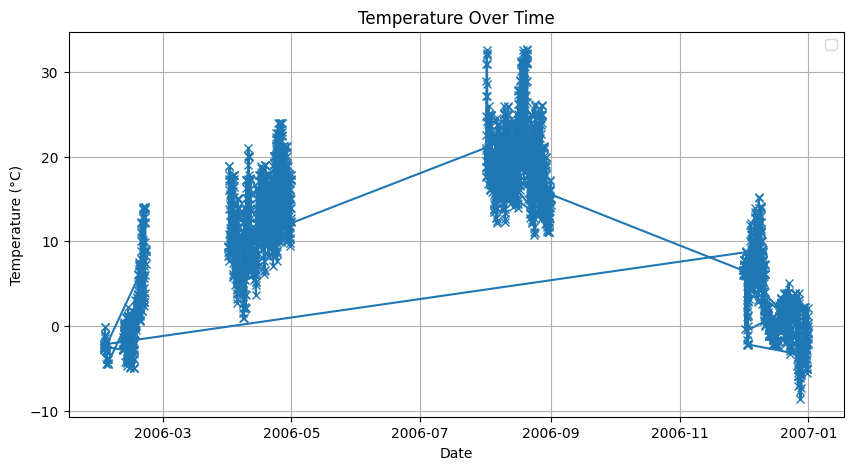

In [43]:
# Plot temperature over time
plt.figure(figsize=(10, 5))
plt.plot(df['Formatted Date'], df['Temperature (C)'], marker='x')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

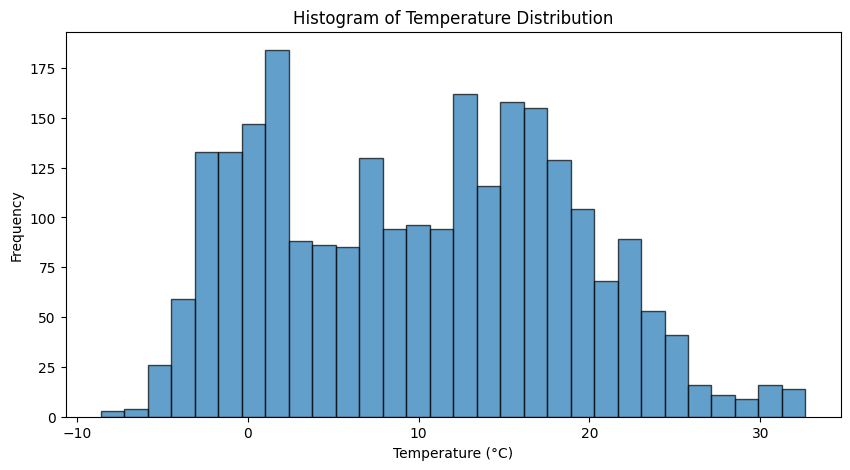

In [44]:
# Plot histogram of Temperature distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Temperature (C)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Distribution')
plt.show()

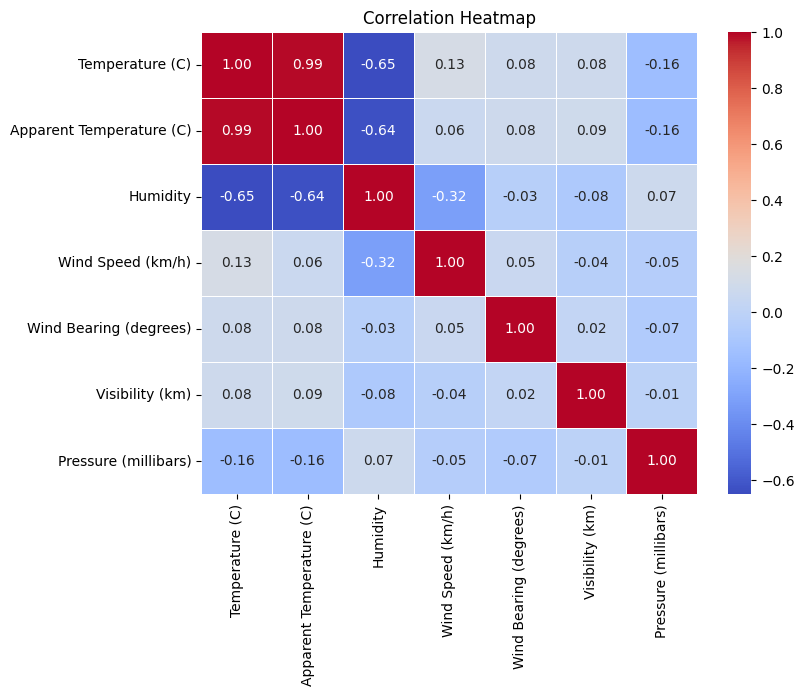

In [46]:
# Generate a correlation heatmap of the dataset
import seaborn
df_corr = df.drop(columns=['Formatted Date'])
corr_matrix = df_corr.corr()
plt.figure(figsize=(8, 6))
seaborn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

A correlation heatmap is a visual way to show how different variables in a dataset are related to each other. Each cell in the heatmap represents the correlation between two variables, with values ranging from -1 to 1:

* 1 means a perfect positive relationship: as one variable increases, the other also increases.
* 0 means no relationship: the variables do not affect each other.
* -1 means a perfect negative relationship: as one variable increases, the other decreases.

The heatmap uses colors to show these values, with warm colors (like red) for
positive correlations and cool colors (like blue) for negative correlations. The stronger the color, the stronger the correlation.